In [1]:
import pandas
import matplotlib.pyplot as plt
import seaborn
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

In [2]:
dataFrame = pandas.read_csv("DataSets/Train.csv")
print(dataFrame)

        Duration Protocol_type   Service Flag  Src_bytes  Dst_bytes  Land  \
0              0           tcp  ftp_data   SF        491          0     0   
1              0           udp     other   SF        146          0     0   
2              0           tcp   private   S0          0          0     0   
3              0           tcp      http   SF        232       8153     0   
4              0           tcp      http   SF        199        420     0   
...          ...           ...       ...  ...        ...        ...   ...   
125968         0           tcp   private   S0          0          0     0   
125969         8           udp   private   SF        105        145     0   
125970         0           tcp      smtp   SF       2231        384     0   
125971         0           tcp    klogin   S0          0          0     0   
125972         0           tcp  ftp_data   SF        151          0     0   

        Wrong_fragment  Urgent  Hot  ...  Dst_host_srv_count  \
0          

In [3]:
dataFrame.head()

,Duration,Protocol_type,Service,Flag,Src_bytes,Dst_bytes,Land,Wrong_fragment,Urgent,Hot,...,Dst_host_srv_count,Dst_host_same\n_srv_rate,Dst_host_diff_ srv_rate,Dst_host_same _src_port_rate,Dst_host_srv_ diff_host_rate,Dst_host_serro r_rate,Dst_host_srv_s error_rate,Dst_host_rerro r_rate,Dst_host_srv_r error_rate,Result
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal
1,0,udp,other,SF,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal
2,0,tcp,private,S0,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune
3,0,tcp,http,SF,232,8153,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal
4,0,tcp,http,SF,199,420,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal


In [4]:
dataFrame.tail()

,Duration,Protocol_type,Service,Flag,Src_bytes,Dst_bytes,Land,Wrong_fragment,Urgent,Hot,...,Dst_host_srv_count,Dst_host_same\n_srv_rate,Dst_host_diff_ srv_rate,Dst_host_same _src_port_rate,Dst_host_srv_ diff_host_rate,Dst_host_serro r_rate,Dst_host_srv_s error_rate,Dst_host_rerro r_rate,Dst_host_srv_r error_rate,Result
125968,0,tcp,private,S0,0,0,0,0,0,0,...,25,0.10,0.06,0.00,0.0,1.00,1.0,0.00,0.0,neptune
125969,8,udp,private,SF,105,145,0,0,0,0,...,244,0.96,0.01,0.01,0.0,0.00,0.0,0.00,0.0,normal
125970,0,tcp,smtp,SF,2231,384,0,0,0,0,...,30,0.12,0.06,0.00,0.0,0.72,0.0,0.01,0.0,normal
125971,0,tcp,klogin,S0,0,0,0,0,0,0,...,8,0.03,0.05,0.00,0.0,1.00,1.0,0.00,0.0,neptune
125972,0,tcp,ftp_data,SF,151,0,0,0,0,0,...,77,0.30,0.03,0.30,0.0,0.00,0.0,0.00,0.0,normal


In [5]:
dataFrame.shape

(125973, 42)

In [6]:
dataFrame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125973 entries, 0 to 125972
Data columns (total 42 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Duration                      125973 non-null  int64  
 1   Protocol_type                 125973 non-null  object 
 2   Service                       125973 non-null  object 
 3   Flag                          125973 non-null  object 
 4   Src_bytes                     125973 non-null  int64  
 5   Dst_bytes                     125973 non-null  int64  
 6   Land                          125973 non-null  int64  
 7   Wrong_fragment                125973 non-null  int64  
 8   Urgent                        125973 non-null  int64  
 9   Hot                           125973 non-null  int64  
 10  Num_failed_logins             125973 non-null  int64  
 11  Logged_in                     125973 non-null  int64  
 12  Num_compromised               125973 non-nul

In [7]:
dataFrame.describe()

,Duration,Src_bytes,Dst_bytes,Land,Wrong_fragment,Urgent,Hot,Num_failed_logins,Logged_in,Num_compromised,...,Dst_host_count,Dst_host_srv_count,Dst_host_same\n_srv_rate,Dst_host_diff_ srv_rate,Dst_host_same _src_port_rate,Dst_host_srv_ diff_host_rate,Dst_host_serro r_rate,Dst_host_srv_s error_rate,Dst_host_rerro r_rate,Dst_host_srv_r error_rate
count,125973.00000,1.259730e+05,1.259730e+05,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,...,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000
mean,287.14465,4.556674e+04,1.977911e+04,0.000198,0.022687,0.000111,0.204409,0.001222,0.395736,0.279250,...,182.148945,115.653005,0.521242,0.082951,0.148379,0.032542,0.284452,0.278485,0.118832,0.120240
std,2604.51531,5.870331e+06,4.021269e+06,0.014086,0.253530,0.014366,2.149968,0.045239,0.489010,23.942042,...,99.206213,110.702741,0.448949,0.188922,0.308997,0.112564,0.444784,0.445669,0.306557,0.319459
min,0.00000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.00000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,82.000000,10.000000,0.050000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.00000,4.400000e+01,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,255.000000,63.000000,0.510000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.00000,2.760000e+02,5.160000e+02,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,255.000000,255.000000,1.000000,0.070000,0.060000,0.020000,1.000000,1.000000,0.000000,0.000000
max,42908.00000,1.379964e+09,1.309937e+09,1.000000,3.000000,3.000000,77.000000,5.000000,1.000000,7479.000000,...,255.000000,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [8]:
dataFrame.isnull()

,Duration,Protocol_type,Service,Flag,Src_bytes,Dst_bytes,Land,Wrong_fragment,Urgent,Hot,...,Dst_host_srv_count,Dst_host_same\n_srv_rate,Dst_host_diff_ srv_rate,Dst_host_same _src_port_rate,Dst_host_srv_ diff_host_rate,Dst_host_serro r_rate,Dst_host_srv_s error_rate,Dst_host_rerro r_rate,Dst_host_srv_r error_rate,Result
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125968,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
125969,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
125970,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
125971,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [9]:
dataFrame.isnull().sum()

Duration                        0
Protocol_type                   0
Service                         0
Flag                            0
Src_bytes                       0
Dst_bytes                       0
Land                            0
Wrong_fragment                  0
Urgent                          0
Hot                             0
Num_failed_logins               0
Logged_in                       0
Num_compromised                 0
Root_shell                      0
Su_attempted                    0
Num_root                        0
Num_file_creations              0
Num_shells                      0
Num_access_files                0
Num_outbound_cmds               0
Is_hot_login                    0
Is_guest_login                  0
Count                           0
Srv_count                       0
Serror_rate                     0
Srv_serror_rate                 0
Rerror_rate                     0
Srv_error_rate                  0
Same_srv_rate                   0
Diff_srv_rate 

In [10]:
dataFrame.columns

Index(['Duration', 'Protocol_type', 'Service', 'Flag', 'Src_bytes',
       'Dst_bytes', 'Land', 'Wrong_fragment', 'Urgent', 'Hot',
       'Num_failed_logins', 'Logged_in', 'Num_compromised', 'Root_shell',
       'Su_attempted', 'Num_root', 'Num_file_creations', 'Num_shells',
       'Num_access_files', 'Num_outbound_cmds', 'Is_hot_login',
       'Is_guest_login', 'Count', 'Srv_count', 'Serror_rate',
       'Srv_serror_rate', 'Rerror_rate', 'Srv_error_rate', 'Same_srv_rate',
       'Diff_srv_rate', 'Srv_diff_host_ rate', 'Dst_host_count',
       'Dst_host_srv_count', 'Dst_host_same\n_srv_rate',
       'Dst_host_diff_ srv_rate', 'Dst_host_same _src_port_rate',
       'Dst_host_srv_ diff_host_rate', 'Dst_host_serro r_rate',
       'Dst_host_srv_s error_rate', 'Dst_host_rerro r_rate',
       'Dst_host_srv_r error_rate', 'Result'],
      dtype='object')

In [11]:
dataFrame["Result"]

0          normal
1          normal
2         neptune
3          normal
4          normal
           ...   
125968    neptune
125969     normal
125970     normal
125971    neptune
125972     normal
Name: Result, Length: 125973, dtype: object

In [12]:
dataFrame["Result"].value_counts(sort=1)

Result
normal             67343
neptune            41214
satan               3633
ipsweep             3599
portsweep           2931
smurf               2646
nmap                1493
back                 956
teardrop             892
warezclient          890
pod                  201
guess_passwd          53
buffer_overflow       30
warezmaster           20
land                  18
imap                  11
rootkit               10
loadmodule             9
ftp_write              8
multihop               7
phf                    4
perl                   3
spy                    2
Name: count, dtype: int64

In [13]:
dataFrame["Result"].value_counts()

Result
normal             67343
neptune            41214
satan               3633
ipsweep             3599
portsweep           2931
smurf               2646
nmap                1493
back                 956
teardrop             892
warezclient          890
pod                  201
guess_passwd          53
buffer_overflow       30
warezmaster           20
land                  18
imap                  11
rootkit               10
loadmodule             9
ftp_write              8
multihop               7
phf                    4
perl                   3
spy                    2
Name: count, dtype: int64

In [14]:
#corolation heatmap visualization
#correlation = dataFrame.corr()
#plt.figure(figsize=(15,15))
#seaborn.heatmap(correlation)
#plt.show()

<Axes: xlabel='Result'>

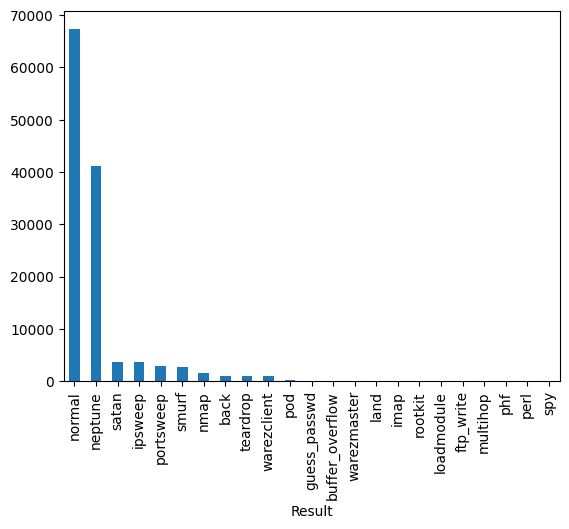

In [15]:
dataFrame["Result"].value_counts().plot.bar()

In [16]:
dataFrame["Protocol_type"].value_counts()

Protocol_type
tcp     102689
udp      14993
icmp      8291
Name: count, dtype: int64

<Axes: xlabel='Protocol_type'>

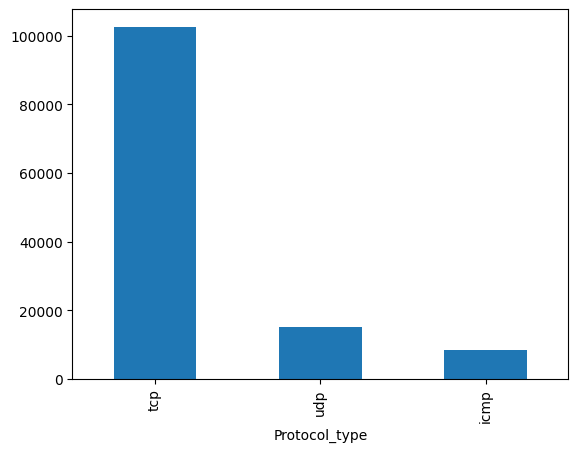

In [17]:
dataFrame["Protocol_type"].value_counts().plot.bar()

In [18]:
dataFrame['Protocol_type'].replace({"tcp": 1, "udp": 2, "icmp": 3}, inplace=True)
dataFrame.head()

,Duration,Protocol_type,Service,Flag,Src_bytes,Dst_bytes,Land,Wrong_fragment,Urgent,Hot,...,Dst_host_srv_count,Dst_host_same\n_srv_rate,Dst_host_diff_ srv_rate,Dst_host_same _src_port_rate,Dst_host_srv_ diff_host_rate,Dst_host_serro r_rate,Dst_host_srv_s error_rate,Dst_host_rerro r_rate,Dst_host_srv_r error_rate,Result
0,0,1,ftp_data,SF,491,0,0,0,0,0,...,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal
1,0,2,other,SF,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal
2,0,1,private,S0,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune
3,0,1,http,SF,232,8153,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal
4,0,1,http,SF,199,420,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal


In [19]:
dataFrame["Service"].value_counts()

Service
http         40338
private      21853
domain_u      9043
smtp          7313
ftp_data      6860
             ...  
tftp_u           3
http_8001        2
aol              2
harvest          2
http_2784        1
Name: count, Length: 70, dtype: int64

In [20]:
dataFrame['Service'].unique()

array(['ftp_data', 'other', 'private', 'http', 'remote_job', 'name',
       'netbios_ns', 'eco_i', 'mtp', 'telnet', 'finger', 'domain_u',
       'supdup', 'uucp_path', 'Z39_50', 'smtp', 'csnet_ns', 'uucp',
       'netbios_dgm', 'urp_i', 'auth', 'domain', 'ftp', 'bgp', 'ldap',
       'ecr_i', 'gopher', 'vmnet', 'systat', 'http_443', 'efs', 'whois',
       'imap4', 'iso_tsap', 'echo', 'klogin', 'link', 'sunrpc', 'login',
       'kshell', 'sql_net', 'time', 'hostnames', 'exec', 'ntp_u',
       'discard', 'nntp', 'courier', 'ctf', 'ssh', 'daytime', 'shell',
       'netstat', 'pop_3', 'nnsp', 'IRC', 'pop_2', 'printer', 'tim_i',
       'pm_dump', 'red_i', 'netbios_ssn', 'rje', 'X11', 'urh_i',
       'http_8001', 'aol', 'http_2784', 'tftp_u', 'harvest'], dtype=object)

In [21]:
service_mapping = {
    'ftp_data': 0, 'other': 1, 'private': 2, 'http': 3, 'remote_job': 4,
    'name': 5, 'netbios_ns': 6, 'eco_i': 7, 'mtp': 8, 'telnet': 9,
    'finger': 10, 'domain_u': 11, 'supdup': 12, 'uucp_path': 13,
    'Z39_50': 14, 'smtp': 15, 'csnet_ns': 16, 'uucp': 17,
    'netbios_dgm': 18, 'urp_i': 19, 'auth': 20, 'domain': 21, 'ftp': 22,
    'bgp': 23, 'ldap': 24, 'ecr_i': 25, 'gopher': 26, 'vmnet': 27,
    'systat': 28, 'http_443': 29, 'efs': 30, 'whois': 31, 'imap4': 32,
    'iso_tsap': 33, 'echo': 34, 'klogin': 35, 'link': 36, 'sunrpc': 37,
    'login': 38, 'kshell': 39, 'sql_net': 40, 'time': 41, 'hostnames': 42,
    'exec': 43, 'ntp_u': 44, 'discard': 45, 'nntp': 46, 'courier': 47,
    'ctf': 48, 'ssh': 49, 'daytime': 50, 'shell': 51, 'netstat': 52,
    'pop_3': 53, 'nnsp': 54, 'IRC': 55, 'pop_2': 56, 'printer': 57,
    'tim_i': 58, 'pm_dump': 59, 'red_i': 60, 'netbios_ssn': 61,
    'rje': 62, 'X11': 63, 'urh_i': 64, 'http_8001': 65, 'aol': 66,
    'http_2784': 67, 'tftp_u': 68, 'harvest': 69
}

dataFrame['Service'].replace(service_mapping, inplace=True)
dataFrame["Service"].value_counts()

Service
3     40338
2     21853
11     9043
15     7313
0      6860
      ...  
68        3
65        2
66        2
69        2
67        1
Name: count, Length: 70, dtype: int64

In [22]:
dataFrame.head()

,Duration,Protocol_type,Service,Flag,Src_bytes,Dst_bytes,Land,Wrong_fragment,Urgent,Hot,...,Dst_host_srv_count,Dst_host_same\n_srv_rate,Dst_host_diff_ srv_rate,Dst_host_same _src_port_rate,Dst_host_srv_ diff_host_rate,Dst_host_serro r_rate,Dst_host_srv_s error_rate,Dst_host_rerro r_rate,Dst_host_srv_r error_rate,Result
0,0,1,0,SF,491,0,0,0,0,0,...,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal
1,0,2,1,SF,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal
2,0,1,2,S0,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune
3,0,1,3,SF,232,8153,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal
4,0,1,3,SF,199,420,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal


In [23]:
dataFrame["Flag"].value_counts()

Flag
SF        74945
S0        34851
REJ       11233
RSTR       2421
RSTO       1562
S1          365
SH          271
S2          127
RSTOS0      103
S3           49
OTH          46
Name: count, dtype: int64

<Axes: xlabel='Flag'>

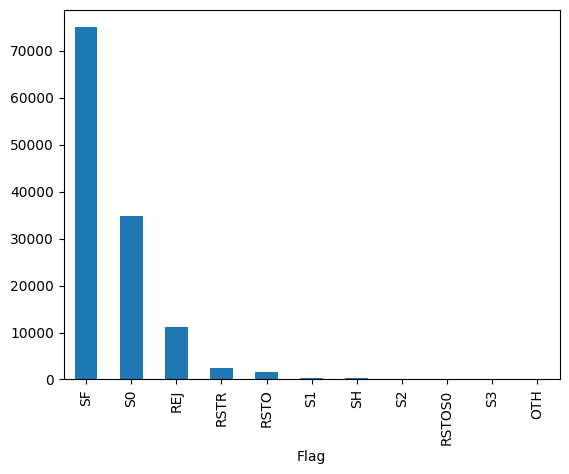

In [24]:
dataFrame["Flag"].value_counts().plot.bar()

In [25]:
dataFrame["Flag"].unique()

array(['SF', 'S0', 'REJ', 'RSTR', 'SH', 'RSTO', 'S1', 'RSTOS0', 'S3',
       'S2', 'OTH'], dtype=object)

In [26]:
flag_mapping = {
    'SF': 0, 'S0': 1, 'REJ': 2, 'RSTR': 3, 'SH': 4, 'RSTO': 5,
    'S1': 6, 'RSTOS0': 7, 'S3': 8, 'S2': 9, 'OTH': 10
}

dataFrame['Flag'].replace(flag_mapping, inplace=True)

In [27]:
dataFrame.loc[dataFrame.Result == "normal", "Result"] = 0
dataFrame.loc[dataFrame.Result == "neptune", "Result"] = 1
dataFrame.loc[dataFrame.Result == "satan", "Result"] = 2
dataFrame.loc[dataFrame.Result == "ipsweep", "Result"] = 3
dataFrame.loc[dataFrame.Result == "portsweep", "Result"] = 4
dataFrame.loc[dataFrame.Result == "smurf", "Result"] = 5
dataFrame.loc[dataFrame.Result == "nmap", "Result"] = 6
dataFrame.loc[dataFrame.Result == "back", "Result"] = 7
dataFrame.loc[dataFrame.Result == "teardrop", "Result"] = 8
dataFrame.loc[dataFrame.Result == "warezclient", "Result"] = 9
dataFrame.loc[dataFrame.Result == "pod", "Result"] = 10
dataFrame.loc[dataFrame.Result == "guess_passwd", "Result"] = 11
dataFrame.loc[dataFrame.Result == "buffer_overflow", "Result"] = 12
dataFrame.loc[dataFrame.Result == "warezmaster", "Result"] = 13
dataFrame.loc[dataFrame.Result == "land", "Result"] = 14
dataFrame.loc[dataFrame.Result == "imap", "Result"] = 15
dataFrame.loc[dataFrame.Result == "rootkit", "Result"] = 16
dataFrame.loc[dataFrame.Result == "loadmodule", "Result"] = 17
dataFrame.loc[dataFrame.Result == "ftp_write", "Result"] = 18
dataFrame.loc[dataFrame.Result == "multihop", "Result"] = 19
dataFrame.loc[dataFrame.Result == "phf", "Result"] = 20
dataFrame.loc[dataFrame.Result == "perl", "Result"] = 21
dataFrame.loc[dataFrame.Result == "spy", "Result"] = 22
dataFrame.head()

,Duration,Protocol_type,Service,Flag,Src_bytes,Dst_bytes,Land,Wrong_fragment,Urgent,Hot,...,Dst_host_srv_count,Dst_host_same\n_srv_rate,Dst_host_diff_ srv_rate,Dst_host_same _src_port_rate,Dst_host_srv_ diff_host_rate,Dst_host_serro r_rate,Dst_host_srv_s error_rate,Dst_host_rerro r_rate,Dst_host_srv_r error_rate,Result
0,0,1,0,0,491,0,0,0,0,0,...,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,0
1,0,2,1,0,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,0
2,0,1,2,1,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,1
3,0,1,3,0,232,8153,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,0
4,0,1,3,0,199,420,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0


In [28]:
#definiing dependent variable
y = dataFrame["Result"].values
print(y)
y = y.astype('int')

[0 0 1 ... 0 1 0]


In [29]:
# Defining dependent variable
X = dataFrame.drop(labels=["Result"], axis=1)
print(X)

        Duration  Protocol_type  Service  Flag  Src_bytes  Dst_bytes  Land  \
0              0              1        0     0        491          0     0   
1              0              2        1     0        146          0     0   
2              0              1        2     1          0          0     0   
3              0              1        3     0        232       8153     0   
4              0              1        3     0        199        420     0   
...          ...            ...      ...   ...        ...        ...   ...   
125968         0              1        2     1          0          0     0   
125969         8              2        2     0        105        145     0   
125970         0              1       15     0       2231        384     0   
125971         0              1       35     1          0          0     0   
125972         0              1        0     0        151          0     0   

        Wrong_fragment  Urgent  Hot  ...  Dst_host_count  Dst_h

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.35, random_state= 25)

In [31]:
 X_train

,Duration,Protocol_type,Service,Flag,Src_bytes,Dst_bytes,Land,Wrong_fragment,Urgent,Hot,...,Dst_host_count,Dst_host_srv_count,Dst_host_same\n_srv_rate,Dst_host_diff_ srv_rate,Dst_host_same _src_port_rate,Dst_host_srv_ diff_host_rate,Dst_host_serro r_rate,Dst_host_srv_s error_rate,Dst_host_rerro r_rate,Dst_host_srv_r error_rate
84781,0,1,3,0,343,13930,0,0,0,0,...,2,255,1.00,0.00,0.50,0.04,0.00,0.00,0.00,0.00
97741,0,1,3,0,290,398,0,0,0,0,...,11,255,1.00,0.00,0.09,0.02,0.00,0.00,0.00,0.01
3555,0,1,3,0,251,4014,0,0,0,0,...,227,255,1.00,0.00,0.00,0.01,0.00,0.00,0.00,0.00
60137,0,1,3,0,308,1075,0,0,0,0,...,255,234,0.92,0.01,0.00,0.00,0.01,0.01,0.00,0.00
87877,0,1,3,0,269,1283,0,0,0,0,...,255,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35702,0,1,2,1,0,0,0,0,0,0,...,255,12,0.05,0.06,0.00,0.00,1.00,1.00,0.00,0.00
92303,0,1,2,2,0,0,0,0,0,0,...,255,3,0.01,0.06,0.00,0.00,0.00,0.00,1.00,1.00
6618,0,2,11,0,44,72,0,0,0,0,...,255,224,0.88,0.01,0.00,0.00,0.00,0.00,0.00,0.00
90430,0,1,3,0,54540,8314,0,0,0,2,...,43,43,1.00,0.00,0.02,0.00,0.00,0.00,0.28,0.28


In [32]:
X_test

,Duration,Protocol_type,Service,Flag,Src_bytes,Dst_bytes,Land,Wrong_fragment,Urgent,Hot,...,Dst_host_count,Dst_host_srv_count,Dst_host_same\n_srv_rate,Dst_host_diff_ srv_rate,Dst_host_same _src_port_rate,Dst_host_srv_ diff_host_rate,Dst_host_serro r_rate,Dst_host_srv_s error_rate,Dst_host_rerro r_rate,Dst_host_srv_r error_rate
34380,0,1,3,0,291,385,0,0,0,0,...,41,255,1.00,0.00,0.02,0.03,0.0,0.0,0.00,0.00
79917,0,1,3,1,0,0,0,0,0,0,...,255,60,0.24,0.02,0.01,0.00,1.0,1.0,0.00,0.00
18047,0,1,3,0,54540,8314,0,0,0,2,...,255,255,1.00,0.00,0.00,0.00,0.0,0.0,0.06,0.06
106219,0,1,0,0,334,0,0,0,0,0,...,250,100,0.40,0.02,0.40,0.00,0.0,0.0,0.00,0.00
18024,0,1,3,0,225,15105,0,0,0,0,...,56,255,1.00,0.00,0.02,0.04,0.0,0.0,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12226,0,1,0,0,5929,0,0,0,0,0,...,97,118,0.49,0.06,0.49,0.02,0.0,0.0,0.00,0.00
77632,0,1,3,0,232,98,0,0,0,0,...,2,255,1.00,0.00,0.50,0.03,0.0,0.0,0.00,0.00
63018,0,1,3,0,300,2239,0,0,0,0,...,255,253,0.99,0.01,0.00,0.00,0.0,0.0,0.00,0.00
88985,0,2,2,0,105,105,0,0,0,0,...,255,242,0.95,0.01,0.00,0.00,0.0,0.0,0.00,0.00


In [33]:
y_train

array([0, 0, 0, ..., 0, 7, 1])

In [34]:
y_test

array([0, 1, 7, ..., 0, 0, 5])

In [44]:
from sklearn.ensemble import RandomForestClassifier
MlModel = RandomForestClassifier(n_estimators= 12, max_depth=30, min_samples_split=12, random_state=35)

In [45]:
MlModel.fit(X_train, y_train)

RandomForestClassifier(max_depth=30, min_samples_split=12, n_estimators=12,
                       random_state=35)

In [46]:
PredrictionTest = MlModel.predict(X_test)
PredrictionTest

array([0, 1, 7, ..., 0, 0, 5])

In [47]:
from sklearn.metrics import accuracy_score
AccuracyScore = accuracy_score(y_test, PredrictionTest)
print("Accuracy Score : ", AccuracyScore)

Accuracy Score :  0.9978907259985031


In [48]:
#cross validation score 
model = RandomForestClassifier()
# Perform cross-validation
TestRunScore = cross_val_score(model, X_train, y_train, cv=20)
# Print the scores for each fold
print("Cross-Validation Scores:", TestRunScore)
# Calculate the mean and standard deviation of the scores
mean_score = TestRunScore.mean()
std_score = TestRunScore.std()
print("Mean Score:", mean_score)
print("")
print("Standard Deviation of Score:", std_score)
print("")

C:\Users\Acer\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_split.py:725: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=20.
  warnings.warn(


Cross-Validation Scores: [0.9978022  0.997558   0.9987787  0.99780166 0.99902296 0.99731314
 0.9987787  0.99804592 0.99829018 0.99780166 0.99780166 0.9987787
 0.99804592 0.99829018 0.99780166 0.99829018 0.99804592 0.99804592
 0.99804592 0.99780166]
Mean Score: 0.9981070424988354

Standard Deviation of Score: 0.0004360347857602171



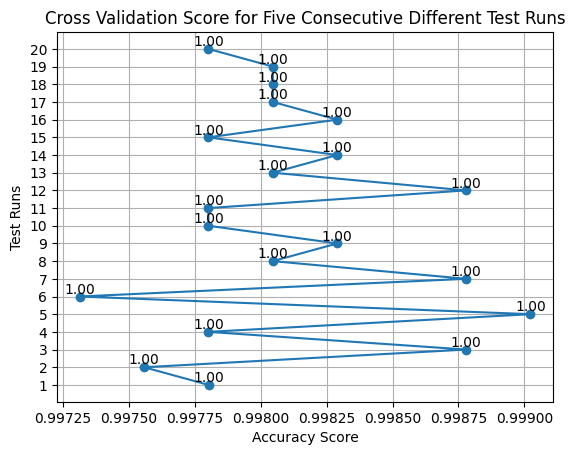

In [49]:
runs = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]
accuracy_scores = TestRunScore

# Create a line graph
plt.plot(accuracy_scores, runs, marker='o')

# Add labels and title
plt.xlabel('Accuracy Score')
plt.ylabel('Test Runs')
plt.title('Cross Validation Score for Five Consecutive Different Test Runs')

# Set y-axis ticks to match the runs
plt.yticks(runs)

# Display the graph
plt.grid(True)

# Display accuracy score on the graph
for run, score in zip(runs, accuracy_scores):
    plt.text(score, run, f'{score:.2f}', ha='center', va='bottom')

plt.show()

In [50]:
#feature importances
# Create a list of feature names
feature_list = list(X.columns)
# Get feature importances from your trained model
feature_importances = pandas.Series(MlModel.feature_importances_, index=feature_list).sort_values(ascending=False)
# Print or display the sorted feature importances
print("Feature Importances:".center(55))
print("")
print(feature_importances)

                  Feature Importances:                 

Src_bytes                       0.131316
Dst_host_serro r_rate           0.085629
Srv_serror_rate                 0.085340
Flag                            0.072308
Diff_srv_rate                   0.066025
Dst_bytes                       0.065076
Dst_host_diff_ srv_rate         0.054662
Same_srv_rate                   0.049808
Serror_rate                     0.046408
Dst_host_same _src_port_rate    0.037370
Count                           0.035765
Service                         0.031268
Dst_host_count                  0.030810
Protocol_type                   0.026141
Srv_count                       0.025866
Dst_host_srv_ diff_host_rate    0.025343
Dst_host_rerro r_rate           0.024852
Srv_error_rate                  0.012902
Dst_host_srv_count              0.012732
Dst_host_same\n_srv_rate        0.012503
Hot                             0.010903
Rerror_rate                     0.010840
Dst_host_srv_r error_rate       0.008377


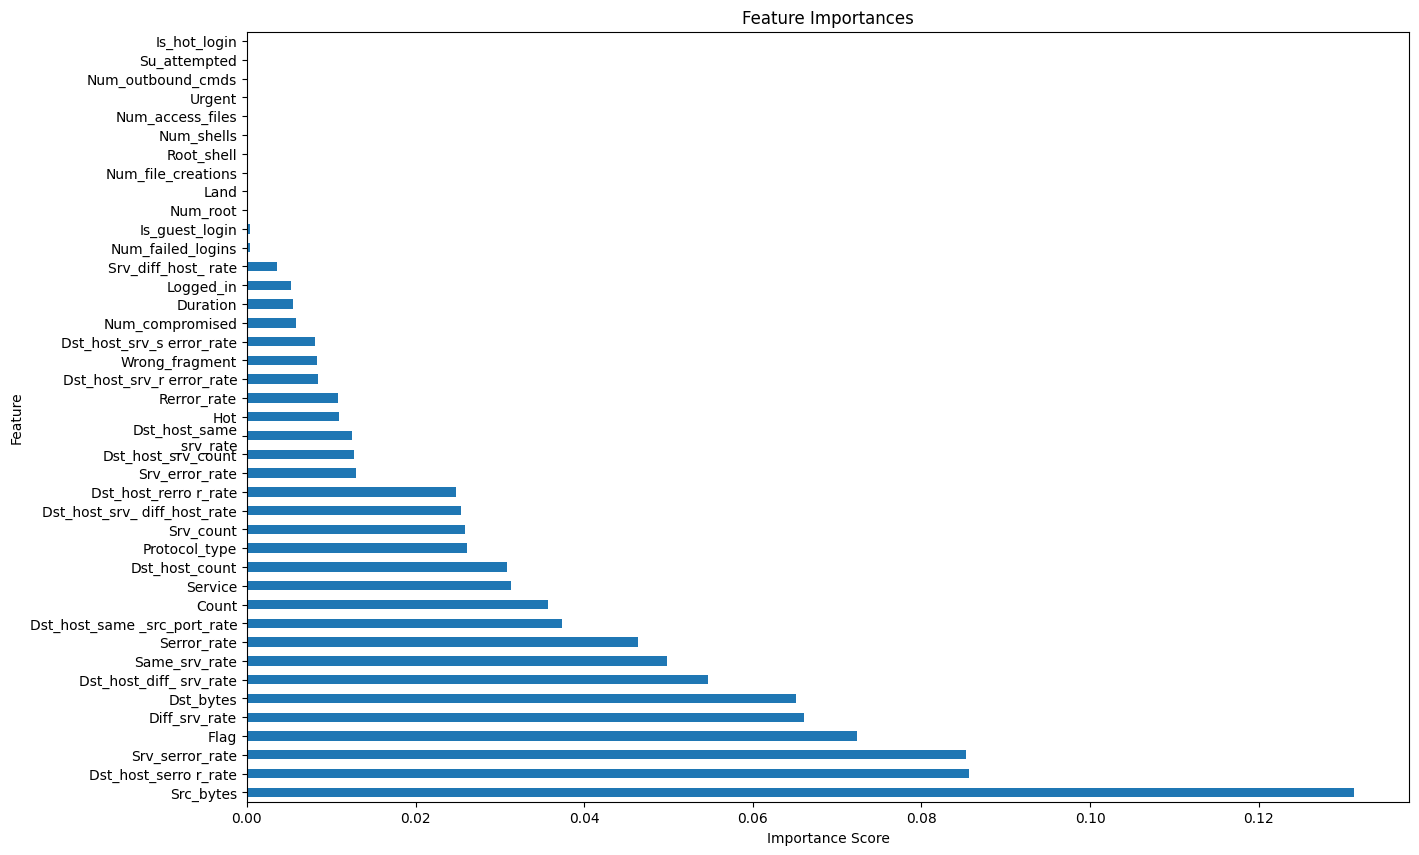

In [55]:
#showing feature importance in graph
# Create a bar plot of feature importances
plt.figure(figsize=(15, 10))
feature_importances.plot(kind='barh')
plt.title('Feature Importances')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.show()


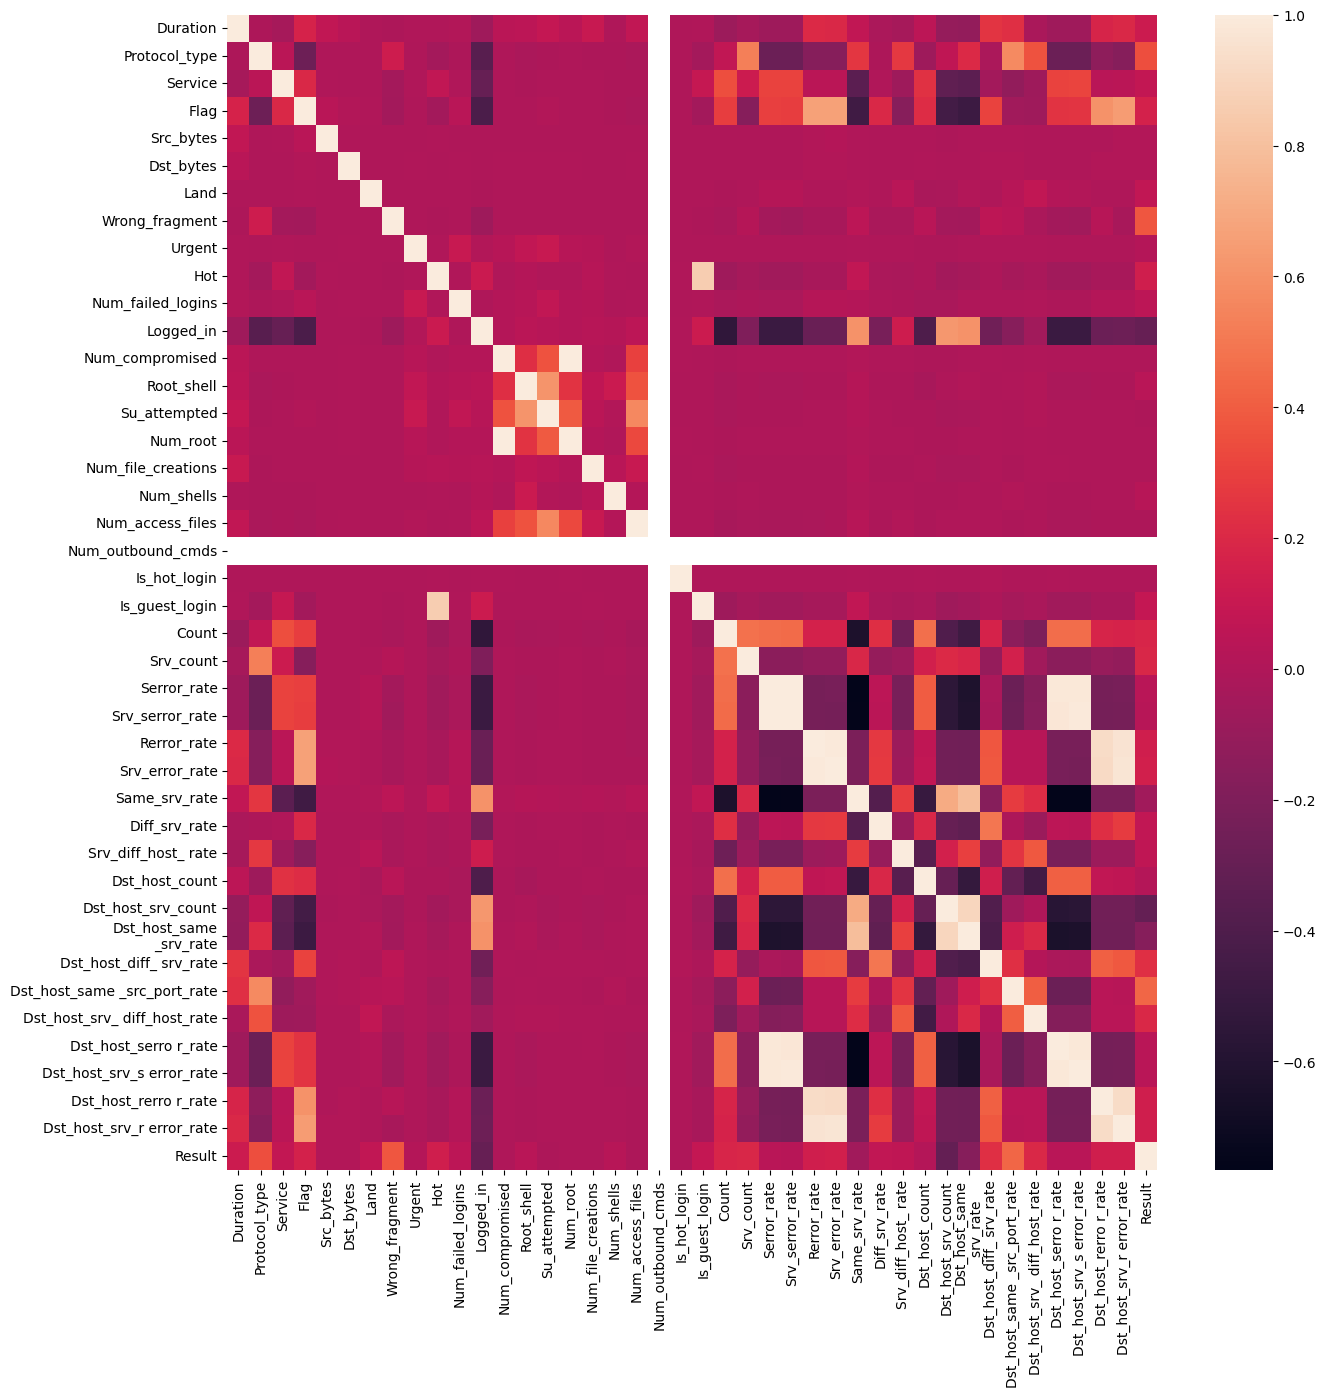

In [52]:
#corolation heatmap visualization
correlation = dataFrame.corr()
plt.figure(figsize=(15,15))
seaborn.heatmap(correlation)
plt.show()